NCU CSIE - ALGORITHM - 110403516 李倬安

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1qCHfycy91EyUFzilBvxu8hYVYp0l6jCh
To: /content/Midterm_Dataset.zip
100% 50.4M/50.4M [00:00<00:00, 52.2MB/s]
94765736/94765736 [==============================] - 5s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 256)               25690368  
                                                                 
 dropout (Dr

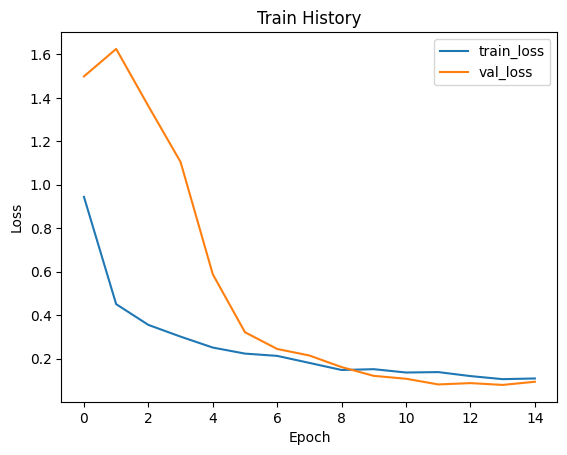

Epoch 1: accuracy = 0.6858, val_accuracy = 0.2319
Epoch 2: accuracy = 0.8300, val_accuracy = 0.2270
Epoch 3: accuracy = 0.8685, val_accuracy = 0.3906
Epoch 4: accuracy = 0.8845, val_accuracy = 0.5477
Epoch 5: accuracy = 0.9034, val_accuracy = 0.7919
Epoch 6: accuracy = 0.9233, val_accuracy = 0.8840
Epoch 7: accuracy = 0.9212, val_accuracy = 0.9194
Epoch 8: accuracy = 0.9307, val_accuracy = 0.9350
Epoch 9: accuracy = 0.9448, val_accuracy = 0.9416
Epoch 10: accuracy = 0.9465, val_accuracy = 0.9531
Epoch 11: accuracy = 0.9516, val_accuracy = 0.9613
Epoch 12: accuracy = 0.9532, val_accuracy = 0.9671
Epoch 13: accuracy = 0.9555, val_accuracy = 0.9729
Epoch 14: accuracy = 0.9610, val_accuracy = 0.9786
Epoch 15: accuracy = 0.9658, val_accuracy = 0.9712


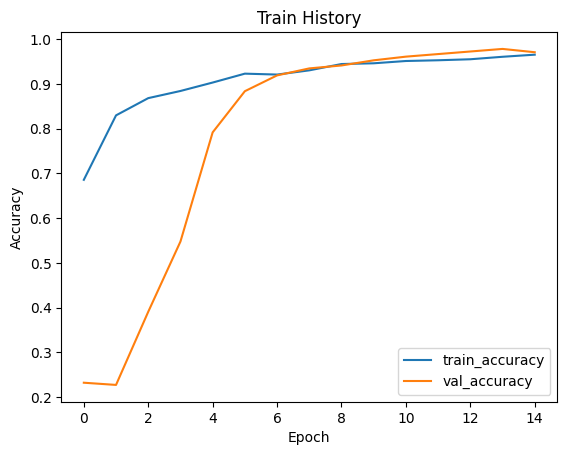

Test loss: 0.04939950257539749
Test accuracy: 0.9855642914772034


In [1]:
import os
import glob
import string
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import shutil
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras import applications
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile


#從Google Drive使用其ID下載一個壓縮文件，並使用zipfile庫將其內容解壓到當前目錄。
!gdown --id '1qCHfycy91EyUFzilBvxu8hYVYp0l6jCh' -O Midterm_Dataset.zip
with zipfile.ZipFile("Midterm_Dataset.zip", "r") as zip_ref:
    zip_ref.extractall()

#設好path
train_path = "MidTerm_Dataset/Train"
test_path = "MidTerm_Dataset/Test"

#用於打亂數據和進行變換時的種子
np.random.seed(42)

#These lines load a pre-trained ResNet50 model from Keras and set its layers to be non-trainable.
resnet_model = applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in resnet_model.layers:
    layer.trainable = False

# pre-trained ResNet50 model as its base, followed by a Flatten layer, two dense layers with ReLU
# and softmax activations respectively, and a dropout layer. 
model = Sequential()
model.add(resnet_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

for layer in model.layers[-10:]:
    layer.trainable = True

# with categorical cross-entropy loss, the Adam optimizer with a learning rate of 1e-5, and accuracy as a metric
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(learning_rate=1e-5), 
              metrics=['accuracy'])

model.summary()

#為了區別train跟test，不要讓test做augmention,設置放縮因子為1/255，把像素值放縮到0和1之間有利於模型的收斂
test_datagen = ImageDataGenerator(rescale=1./255)

#These lines create ImageDataGenerator objects for data augmentation and scaling for the training and test sets respectively.
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,  
    vertical_flip=True,
    rotation_range=75, 
    zoom_range=0.3,
    width_shift_range=0.2,  
    height_shift_range=0.3,  
    validation_split=0.2
)   

training_set = train_datagen.flow_from_directory(train_path,target_size=(224, 224),batch_size=32,class_mode='categorical',subset='training',shuffle=True)
                                           
val_set = train_datagen.flow_from_directory(train_path,target_size=(224, 224),batch_size=32,class_mode='categorical',subset='validation',shuffle=True)

test_set = test_datagen.flow_from_directory(test_path,target_size=(224, 224),batch_size=32,class_mode='categorical',shuffle=True)


#train model
history=model.fit(training_set, validation_data=val_set, epochs=15,verbose=1)

# Print loss and validation loss for each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
for epoch in range(len(loss)):
    print("Epoch {}: loss = {:.4f}, val_loss = {:.4f}".format(epoch+1, loss[epoch], val_loss[epoch]))

# Plot the training and validation loss
plt.plot(loss, label='train_loss')
plt.plot(val_loss, label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Train History")
plt.legend()
plt.show()

# Print accuracy and validation accuracy for each epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
for epoch in range(len(acc)):
    print("Epoch {}: accuracy = {:.4f}, val_accuracy = {:.4f}".format(epoch+1, acc[epoch], val_acc[epoch]))

# Plot the training and validation accuracy
plt.plot(acc, label='train_accuracy')
plt.plot(val_acc, label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Train History")
plt.legend()
plt.show()

#Print Test loss and Test accuracy
test_loss, test_acc = model.evaluate(test_set, verbose=0)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_acc}')

                                           